# S&P 500 내 각 섹터 분석

In [1]:
import pandas as pd
import yfinance as yf


url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tbl = pd.read_html(url)

S_P_data= tbl[0]
S_P_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [2]:
S_P_data_symbol_sector = S_P_data[['Symbol', 'GICS Sector']]
S_P_data_symbol_sector.columns = ['Ticker', 'Sector']
S_P_data_symbol_sector_sorted = S_P_data_symbol_sector.sort_values(by='Ticker', ascending=True)

In [3]:
# 주가 데이터 다운로드
data_raw = yf.download(S_P_data_symbol_sector['Ticker'].tolist(), start='2020-01-01',end='2025-01-01', auto_adjust=True)['Close']   # 종가 데이터만 뽑기

[**********************93%********************   ]  469 of 503 completedCould not get exchangeTimezoneName for ticker 'ETR' reason: 'chart'
[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
['BRK.B', 'ETR']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-01-01)')


In [4]:
data_raw

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,83.061340,72.716072,71.589775,NaN,79.273949,41.268997,195.263596,334.429993,109.912369,40.313679,...,190.670792,24.381451,139.762299,53.556568,55.137978,75.240517,93.090317,139.312683,259.140015,128.819427
2020-01-03,81.727722,72.009117,70.910263,NaN,78.307526,41.221451,194.938416,331.809998,107.977516,40.234989,...,190.717407,24.422928,137.689209,53.814133,54.694702,75.683395,92.798759,138.948502,256.049988,128.838623
2020-01-06,81.969345,72.582909,71.469856,NaN,78.717796,41.383106,193.665436,333.709991,106.708900,39.920250,...,190.950821,24.373158,137.416656,53.736862,55.114655,75.193420,92.744087,138.145523,258.010010,127.849510
2020-01-07,82.220573,72.241547,71.062157,NaN,78.280190,41.040779,189.484192,333.390015,109.136597,39.439377,...,190.558762,24.215536,138.068771,53.625244,54.663601,74.910728,92.908089,138.024094,256.470001,128.281662
2020-01-08,83.032349,73.403633,71.565796,NaN,78.599289,40.631893,189.855820,337.869995,110.122299,39.002243,...,190.773438,24.306789,138.934998,53.573742,53.839245,75.165138,93.072098,139.676834,247.639999,128.003143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.848907,257.916443,178.318420,134.990005,114.160919,92.669998,361.630005,447.940002,218.089996,50.630001,...,315.142151,28.260000,88.779999,67.649513,105.456718,118.150002,135.000000,107.059036,395.440002,164.203583
2024-12-26,135.579407,258.735504,177.525894,135.320007,114.668251,92.930000,360.429993,450.160004,218.059998,50.610001,...,316.976990,28.170000,89.309998,67.619759,105.545921,118.470001,136.000000,107.009148,396.850006,165.021118
2024-12-27,135.289932,255.309296,176.347015,133.384995,114.389717,92.339996,356.179993,446.480011,216.990005,50.580002,...,315.421387,27.990000,88.680000,67.580086,105.536011,117.529999,135.229996,106.630005,389.070007,164.103897


In [6]:
data_tuple_columns = [(x, y) for x, y in zip(data_raw.columns, S_P_data_symbol_sector['Sector'].tolist())]      # ticker와 sector가 튜플로 구성되어 있는 열의 이름들 생성
data_tuple = data_raw.copy()
data_tuple.columns = data_tuple_columns

In [7]:
data_tuple # 종가 데이터

,"(A, Industrials)","(AAPL, Industrials)","(ABBV, Health Care)","(ABNB, Health Care)","(ABT, Information Technology)","(ACGL, Information Technology)","(ACN, Information Technology)","(ADBE, Utilities)","(ADI, Financials)","(ADM, Health Care)",...,"(WTW, Energy)","(WY, Financials)","(WYNN, Information Technology)","(XEL, Consumer Discretionary)","(XOM, Utilities)","(XYL, Industrials)","(YUM, Consumer Discretionary)","(ZBH, Information Technology)","(ZBRA, Health Care)","(ZTS, Health Care)"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,83.061340,72.716072,71.589775,NaN,79.273949,41.268997,195.263596,334.429993,109.912369,40.313679,...,190.670792,24.381451,139.762299,53.556568,55.137978,75.240517,93.090317,139.312683,259.140015,128.819427
2020-01-03,81.727722,72.009117,70.910263,NaN,78.307526,41.221451,194.938416,331.809998,107.977516,40.234989,...,190.717407,24.422928,137.689209,53.814133,54.694702,75.683395,92.798759,138.948502,256.049988,128.838623
2020-01-06,81.969345,72.582909,71.469856,NaN,78.717796,41.383106,193.665436,333.709991,106.708900,39.920250,...,190.950821,24.373158,137.416656,53.736862,55.114655,75.193420,92.744087,138.145523,258.010010,127.849510
2020-01-07,82.220573,72.241547,71.062157,NaN,78.280190,41.040779,189.484192,333.390015,109.136597,39.439377,...,190.558762,24.215536,138.068771,53.625244,54.663601,74.910728,92.908089,138.024094,256.470001,128.281662
2020-01-08,83.032349,73.403633,71.565796,NaN,78.599289,40.631893,189.855820,337.869995,110.122299,39.002243,...,190.773438,24.306789,138.934998,53.573742,53.839245,75.165138,93.072098,139.676834,247.639999,128.003143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.848907,257.916443,178.318420,134.990005,114.160919,92.669998,361.630005,447.940002,218.089996,50.630001,...,315.142151,28.260000,88.779999,67.649513,105.456718,118.150002,135.000000,107.059036,395.440002,164.203583
2024-12-26,135.579407,258.735504,177.525894,135.320007,114.668251,92.930000,360.429993,450.160004,218.059998,50.610001,...,316.976990,28.170000,89.309998,67.619759,105.545921,118.470001,136.000000,107.009148,396.850006,165.021118
2024-12-27,135.289932,255.309296,176.347015,133.384995,114.389717,92.339996,356.179993,446.480011,216.990005,50.580002,...,315.421387,27.990000,88.680000,67.580086,105.536011,117.529999,135.229996,106.630005,389.070007,164.103897


In [16]:
S_P_data_symbol_sector_sorted['Sector'].unique().tolist()

['Health Care',
 'Information Technology',
 'Consumer Discretionary',
 'Financials',
 'Consumer Staples',
 'Industrials',
 'Utilities',
 'Materials',
 'Real Estate',
 'Energy',
 'Communication Services']

In [17]:
sector_name = S_P_data_symbol_sector_sorted['Sector'].unique().tolist()
data_sector = {}
for sector in sector_name:      # 섹터 별로 데이터 분리하기
    data_sector[f'{sector}'] = data_tuple.loc[:, [columns[1] == f'{sector}' for columns in data_tuple.columns]]

In [20]:
import pandas_ta as ta

for df in data_sector.values():
    df['average_close'] = df.mean(axis=1)       # 당일 섹터의 평균을 구한다.
    df['SMA_20'] = ta.sma(df['average_close'], length=20)       # 20일 단순 이동평균
    df['SMA_60'] = ta.sma(df['average_close'], length=60)       # 60일 단순 이동평균

/tmp/ipykernel_35735/676753863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_close'] = df.mean(axis=1)       # 당일 섹터의 평균을 구한다.
/tmp/ipykernel_35735/676753863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_20'] = ta.sma(df['average_close'], length=20)       # 20일 단순 이동평균
/tmp/ipykernel_35735/676753863.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

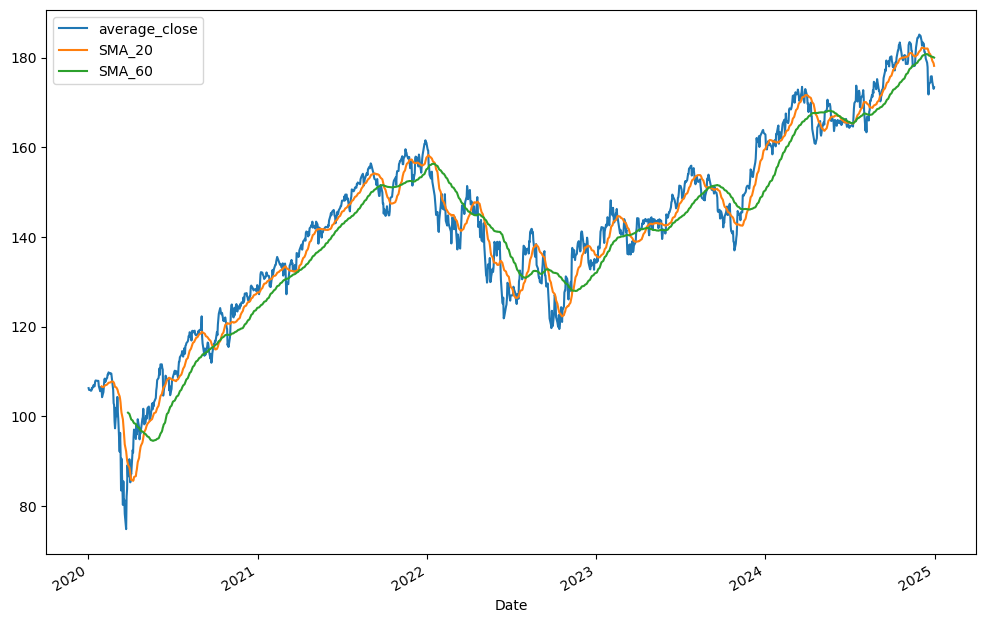

In [23]:
import matplotlib.pyplot as plt
data_sector['Health Care'][['average_close', 'SMA_20', 'SMA_60']].plot(figsize=(12, 8))
plt.show()